# **Assignment 2**

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/paulaskie/BUSA2001/main/weatherAUS.csv")

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.dropna(how= "all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.dropna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [ ]:
print(df.Location.unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.shape

(145460, 23)

<AxesSubplot:>

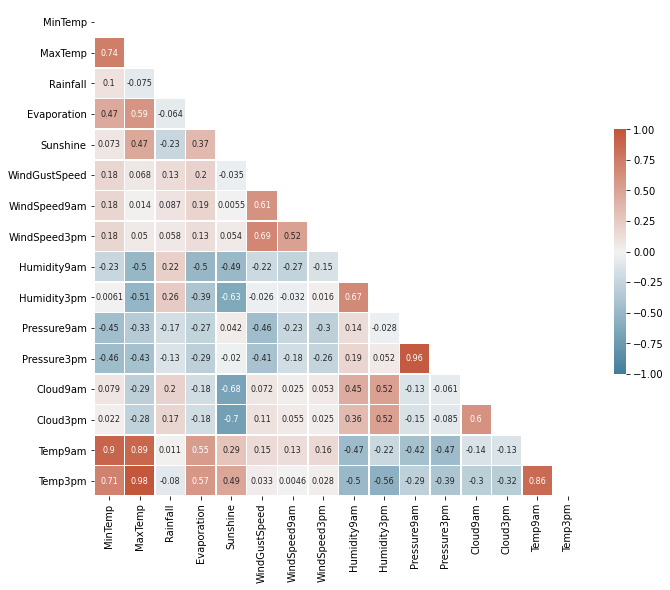

In [ ]:
# adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
df = pd.read_csv("https://raw.githubusercontent.com/paulaskie/BUSA2001/main/weatherAUS.csv")

# Use if you want to inspect by location
#df = df[df.Location == 'AliceSprings']

# stores the values for the correlation between features
corr = df.corr()

# hides the upper triangle as it is the same as the lower triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool)) 

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True) 

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            center=0, 
            vmin=-1,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            annot=True, 
            annot_kws={"size": 8})

# ML Model (Decision Tree) Dropping all NA and Oversampling

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/paulaskie/BUSA2001/main/weatherAUS.csv")
df = df.dropna()
x = df.loc[:, df.columns != 'RainTomorrow'] # Predictors
x = x.select_dtypes(include=np.number)
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2


In [ ]:
y = df.loc[:, df.columns == 'RainTomorrow']
y

,RainTomorrow
6049,No
6050,No
6052,No
6053,No
6054,No
...,...
142298,No
142299,No
142300,No
142301,No


In [ ]:
dt = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
y_train.value_counts()

RainTomorrow
No              33017
Yes              9298
dtype: int64

In [ ]:
oversample = RandomOverSampler()
x_train, y_train = oversample.fit_resample(x_train, y_train)
x_train = pd.DataFrame(x_train, columns=x.columns)
y_train = pd.DataFrame(y_train, columns=["RainTomorrow"])
y_train.value_counts()

RainTomorrow
No              33017
Yes             33017
dtype: int64

In [ ]:
# next steps would be to run with categorical variables, possibly one-hot encoding 
# categorical variables

dt.fit(x_train, y_train)
pred = dt.predict(x_test)
print(dt.score(x_test,y_test, sample_weight=None))

0.7962424672102092


In [ ]:
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.7962424672102092
              precision    recall  f1-score   support

          No      0.869     0.869     0.869     10976
         Yes      0.541     0.542     0.541      3129

    accuracy                          0.796     14105
   macro avg      0.705     0.705     0.705     14105
weighted avg      0.796     0.796     0.796     14105



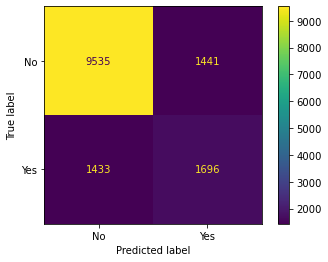

In [ ]:
cm = confusion_matrix(y_test, pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot(values_format='.0f')
plt.show()

# ML Model (Decision Tree) With KNN Imputation, Scaling & Random Oversampling

In [ ]:
##### TAKES A LONG TIME, AROUND 25 MINUTES #####

# saved to csv. Download from here (40MB) https://drive.google.com/file/d/1-8gTPKghjF0T-FrNbBcMWU58arypYUT1/view?usp=sharing
# or run with 10000 lines by removing the comment on the next line and running with only 10000 rows

df_imputed = pd.read_csv("https://raw.githubusercontent.com/paulaskie/BUSA2001/main/weatherAUS.csv")#.head(10000)

# drops all NAs in the RainTomorrow column
df_imputed = df_imputed.dropna(subset = ['RainTomorrow'])

# selects only numerical columns
df_imputed_numeric = df_imputed.select_dtypes(include=np.number)

# using a scaler for the imputations so that the same weight is given to each value
scaler = MinMaxScaler()

# fits the scaler to the data and transforms the values in place and reinputs back into a dataframe
df_imputed_numeric = pd.DataFrame(scaler.fit_transform(df_imputed_numeric), columns = df_imputed_numeric.columns)

# selects only non-numerical columns
df_imputed_other = df_imputed.select_dtypes(exclude=np.number)

# imputs by clustering, n_neighbours needs to be tuned for optimal results
imputer_KNN = KNNImputer(n_neighbors=5, weights="uniform", missing_values=np.nan)

# fits the imputer to the scaled data and transforms the values in place and reinputs back into a dataframe
df_imputed_numeric_KNN = pd.DataFrame(imputer_KNN.fit_transform(df_imputed_numeric), 
                                  columns = df_imputed_numeric.columns)

In [ ]:
df_imputed_KNN = pd.merge(df_imputed_other, df_imputed_numeric_KNN, left_index=True, right_index=True)

### the below comment was used to create the csv file so that it didn't need to be run in testing
# df_imputed_KNN.to_csv('df_imputed_numeric_KNN.csv', index=False)

len(df_imputed_KNN.index)

139003

In [ ]:
### use the below line if not running the above 2 blocks of code
# saved to csv. Download from here (40MB) https://drive.google.com/file/d/1-8gTPKghjF0T-FrNbBcMWU58arypYUT1/view?usp=sharing
# df_imputed_KNN = pd.read_csv("df_imputed_numeric_KNN.csv")
# len(df_imputed_KNN.index)

In [ ]:
y_imp_KNN = df_imputed_KNN.loc[:,'RainTomorrow'].astype('category')
y_imp_KNN.value_counts()

No     107535
Yes     31468
Name: RainTomorrow, dtype: int64

In [ ]:
x_imp_KNN = df_imputed_KNN.select_dtypes(include=np.number)

In [ ]:
x_imp_KNN_train, x_imp_KNN_test, y_imp_KNN_train, y_imp_KNN_test = train_test_split(x_imp_KNN, 
                                                                                    y_imp_KNN, 
                                                                                    test_size = 0.25)
# oversample on the training data only to test on unedited data
oversample = RandomOverSampler()
x_imp_KNN_train, y_imp_KNN_train = oversample.fit_resample(x_imp_KNN_train, y_imp_KNN_train)
x_imp_KNN_train = pd.DataFrame(x_imp_KNN_train, columns=df_imputed_numeric.columns)
y_imp_KNN = pd.DataFrame(y_imp_KNN, columns=['RainTomorrow'])

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_imp_KNN_train, y_imp_KNN_train)
pred = dt.predict(x_imp_KNN_test)

print('Accuracy:', accuracy_score(y_imp_KNN_test, pred))
print(classification_report(y_imp_KNN_test, pred, digits=3))

Accuracy: 0.6456792610284596
              precision    recall  f1-score   support

          No      0.771     0.769     0.770     26769
         Yes      0.231     0.234     0.233      7982

    accuracy                          0.646     34751
   macro avg      0.501     0.501     0.501     34751
weighted avg      0.647     0.646     0.646     34751



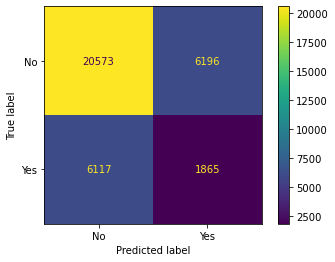

In [ ]:
cm = confusion_matrix(y_imp_KNN_test, pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot(values_format='.0f')
plt.show()

# ML Model (Decision Tree) with Mean Imputation

In [ ]:
# uses a simple imputer that input the scaled mean value for the column if there is a missing value

imputer_simple = SimpleImputer(strategy = 'mean')
df_imputed = pd.read_csv("https://raw.githubusercontent.com/paulaskie/BUSA2001/main/weatherAUS.csv")
df_imputed = df_imputed.dropna(subset = ['RainTomorrow'])
df_imputed_numeric = df_imputed.select_dtypes(include=np.number)
scaler = MinMaxScaler()
df_imputed_numeric = pd.DataFrame(scaler.fit_transform(df_imputed_numeric), columns = df_imputed_numeric.columns)
df_imputed_other = df_imputed.select_dtypes(exclude=np.number)
df_imputed_numeric_simple = pd.DataFrame(imputer_simple.fit_transform(df_imputed_numeric), 
                                  columns = df_imputed_numeric.columns)

In [ ]:
df_imputed_simple = pd.merge(df_imputed_other, df_imputed_numeric_simple, left_index=True, right_index=True)
df_imputed_simple

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,W,W,WNW,No,No,0.516509,0.523629,0.001617,...,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,0.375000,0.565217,0.000000,...,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058
2,2008-12-03,Albury,WSW,W,WSW,No,No,0.504717,0.576560,0.000000,...,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944
3,2008-12-04,Albury,NE,SE,E,No,No,0.417453,0.620038,0.000000,...,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284
4,2008-12-05,Albury,W,ENE,NW,No,No,0.613208,0.701323,0.002695,...,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-03-02,Darwin,ESE,SSW,WNW,No,No,0.283019,0.502836,0.000000,...,0.115385,0.149425,0.59,0.27,0.730579,0.7056,0.493021,0.500352,0.350211,0.504798
142189,2017-03-03,Darwin,SSE,W,NW,No,Yes,0.266509,0.533081,0.000000,...,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.493021,0.500352,0.364979,0.533589
142190,2017-03-04,Darwin,E,SSE,SE,Yes,Yes,0.285377,0.568998,0.000000,...,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.493021,0.500352,0.381857,0.573896
142191,2017-03-05,Darwin,ESE,E,NNE,Yes,Yes,0.327830,0.599244,0.000000,...,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.493021,0.500352,0.415612,0.604607


In [ ]:
y_imp_simple = df_imputed_simple.loc[:,'RainTomorrow'].astype('category')
y_imp_simple.value_counts()

No     107535
Yes     31468
Name: RainTomorrow, dtype: int64

In [ ]:
x_imp_simple = df_imputed_simple.select_dtypes(include=np.number)


In [ ]:
dt = DecisionTreeClassifier()
x_imp_simple_train, x_imp_simple_test, y_imp_simple_train, y_imp_simple_test = train_test_split(x_imp_simple, 
                                                                                                y_imp_simple, 
                                                                                                test_size = 0.25)
# oversample on the training data only to test on unedited data
oversample = RandomOverSampler()
x_imp_simple_train, y_imp_simple_train = oversample.fit_resample(x_imp_simple_train, y_imp_simple_train)
x_imp_simple_train = pd.DataFrame(x_imp_simple_train, columns=df_imputed_numeric.columns)
y_imp_simple_train = pd.DataFrame(y_imp_simple_train, columns=['RainTomorrow'])
y_imp_simple_train.value_counts()

RainTomorrow
No              80609
Yes             80609
dtype: int64

In [ ]:
dt.fit(x_imp_simple_train, y_imp_simple_train)
pred = dt.predict(x_imp_simple_test)
print(dt.score(x_imp_simple_test, y_imp_simple_test, sample_weight=None))

0.6514632672441081


In [ ]:
print('Accuracy:', accuracy_score(y_imp_simple_test, pred))
print(classification_report(y_imp_simple_test, pred, digits=3))

Accuracy: 0.6514632672441081
              precision    recall  f1-score   support

          No      0.777     0.772     0.774     26926
         Yes      0.231     0.236     0.234      7825

    accuracy                          0.651     34751
   macro avg      0.504     0.504     0.504     34751
weighted avg      0.654     0.651     0.653     34751



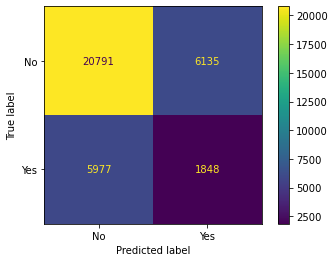

In [ ]:
cm = confusion_matrix(y_imp_simple_test, pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot(values_format='.0f')
plt.show()

# ML Model (XGBoost) With One-Hot Encoding & Random Oversampling

In [ ]:
df_XGB = pd.read_csv("https://raw.githubusercontent.com/paulaskie/BUSA2001/main/weatherAUS.csv")

# one hot encoding of categorical variable so that it can be used in the XGBoost algorithm
# drops the first dummy variable so that the missing dummy variable is implied by all 0's
OHE = pd.get_dummies(data=df_XGB, 
                     columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'],
                     drop_first = True)

# dropping date as provides no useful onehot encoding. TO DO: Splitting the month probably should provide some value.
x_XGB = OHE.drop(['RainTomorrow_Yes', 'Date'], axis=1) 

y_XGB = OHE.loc[:, OHE.columns == 'RainTomorrow_Yes']

x_XGB_train, x_XGB_test, y_XGB_train, y_XGB_test = train_test_split(x_XGB, y_XGB, test_size = 0.25)
x_XGB.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,1,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# scale_pos_weight parameter places a higher weight on the positive class when set to > 1
# used GridSearchCV to find the best hyperparameter
XGB = XGBClassifier(scale_pos_weight = 1.2)
XGB.fit(x_XGB_train, y_XGB_train)
pred = XGB.predict(x_XGB_test)

print('Accuracy:', accuracy_score(y_XGB_test, pred))
print(classification_report(y_XGB_test, pred, digits=3))

C:\Users\Me\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Me\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:42:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8592602777395848
              precision    recall  f1-score   support

           0      0.890     0.936     0.912     28410
           1      0.719     0.585     0.645      7955

    accuracy                          0.859     36365
   macro avg      0.804     0.760     0.779     36365
weighted avg      0.852     0.859     0.854     36365



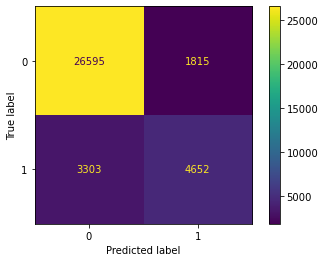

In [ ]:
cm = confusion_matrix(y_XGB_test, pred, labels=XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=XGB.classes_)
disp.plot(values_format='.0f')
plt.show()